# Super Resolution TFGAN

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/super-resolution-tfgan](https://github.com/huseinzol05/malaya-speech/tree/master/example/super-resolution-tfgan).
    
</div>

<div class="alert alert-info">

This module is language independent, so it save to use on different languages. Pretrained models trained on multilanguages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

### Dataset

Trained on English, Manglish and Bahasa podcasts with augmented noises, gathered at https://github.com/huseinzol05/malaya-speech/tree/master/data/podcast

Purpose of this module to increase sample rate.

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import IPython.display as ipd

In [2]:
import logging

logging.basicConfig(level=logging.INFO)

### List available TFGAN deep models

In [3]:
malaya_speech.super_resolution.available_tfgan()

INFO:malaya_speech.super_resolution:Only calculate SDR, ISR, SAR on voice sample. Higher is better.


Size (MB)
voicefixer      489.0
nvsr            468.0

### Load UNET deep model

```python
def tfgan(model: str = 'voicefixer', **kwargs):
    """
    Load TFGAN based Speech Resolution.

    Parameters
    ----------
    model : str, optional (default='voicefixer')
        Model architecture supported. Allowed values:

        * ``'voicefixer'`` - originally from https://github.com/haoheliu/voicefixer.
        * ``'nvsr'`` - originally from https://github.com/haoheliu/ssr_eval/tree/main/examples/NVSR.

    Returns
    -------
    result : malaya_speech.torch_model.super_resolution.VoiceFixer
    """
```

In [4]:
model = malaya_speech.super_resolution.tfgan(model = 'voicefixer')

INFO:malaya_boilerplate.huggingface:downloading frozen huseinzol05/VoiceFixer/model.pth
INFO:malaya_boilerplate.huggingface:downloading frozen huseinzol05/TFGAN/model.pth


### Important factor

1. Currently TFGAN Super Resolution only able to upsample to 44100 sampling rate, so if you have lower sampling rate, interpolate the audio with 44100 sampling rate and predict using the model

### Predict

```python
def predict(self, input, remove_higher_frequency: bool = True):
    """
    Parameters
    ----------
    input: np.array
        np.array or malaya_speech.model.frame.Frame,
        must an audio with 44100 sampling rate.
    remove_higher_frequency: bool, optional (default = True)
        Remove high frequency before neural upsampling.

    Returns
    -------
    result: np.array
    """
```

In [5]:
sr = 44100
lower_sr = 8000

In [6]:
original_y, _ = malaya_speech.load('speech/44k/test-0.wav', sr = sr)
original_y = original_y[: sr * 4]
len(original_y) / sr

4.0

In [7]:
ipd.Audio(original_y, rate = sr)

In [8]:
y, sr_ = malaya_speech.load('speech/44k/test-0.wav', sr = lower_sr)
y = malaya_speech.resample(y, lower_sr, sr)
y = y[:sr * 4]
ipd.Audio(y, rate = sr)

In [9]:
%%time

output = model(y)
ipd.Audio(output, rate = sr)

CPU times: user 13.6 s, sys: 3.52 s, total: 17.1 s
Wall time: 4.97 s


In [10]:
import librosa
import matplotlib.pyplot as plt

In [11]:
sampling_rate = 44100
fft_size = 2048
hop_size = 256
win_length = None
window = 'hann'
num_mels = 128
fmin = 0
fmax = None

mel_basis = librosa.filters.mel(
    sr=sampling_rate,
    n_fft=fft_size,
    n_mels=num_mels,
    fmin=fmin,
    fmax=fmax,
)

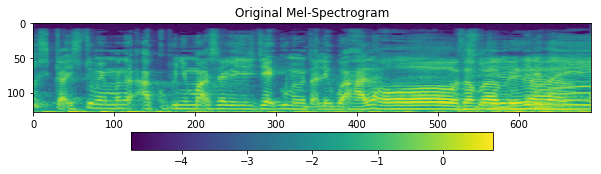

In [12]:
D = librosa.stft(
    original_y,
    n_fft=fft_size,
    hop_length=hop_size,
    win_length=win_length,
    window=window,
    pad_mode='reflect',
)
S, _ = librosa.magphase(D)
mel = np.log10(np.maximum(np.dot(mel_basis, S), 1e-10)).T
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Original Mel-Spectrogram')
im = ax1.imshow(np.rot90(mel), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

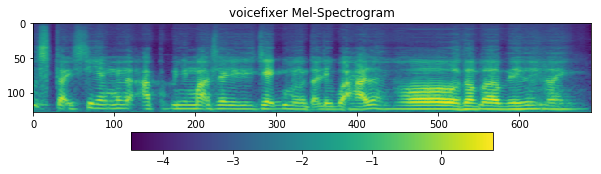

In [13]:
D = librosa.stft(
    output,
    n_fft=fft_size,
    hop_length=hop_size,
    win_length=win_length,
    window=window,
    pad_mode='reflect',
)
S, _ = librosa.magphase(D)
mel = np.log10(np.maximum(np.dot(mel_basis, S), 1e-10)).T
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('voicefixer Mel-Spectrogram')
im = ax1.imshow(np.rot90(mel), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

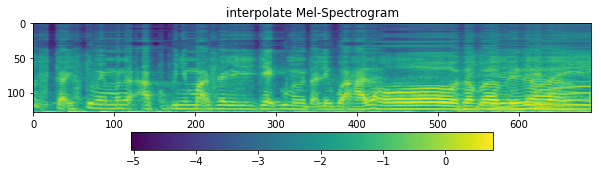

In [14]:
D = librosa.stft(
    y,
    n_fft=fft_size,
    hop_length=hop_size,
    win_length=win_length,
    window=window,
    pad_mode='reflect',
)
S, _ = librosa.magphase(D)
mel = np.log10(np.maximum(np.dot(mel_basis, S), 1e-10)).T
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('interpolate Mel-Spectrogram')
im = ax1.imshow(np.rot90(mel), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Try more examples

In [15]:
y, sr_ = malaya_speech.load('speech/call-centre/1.wav', sr = 44100)
y = y[sr_ * 5 :sr_ * 10]
sr_

44100

In [16]:
ipd.Audio(y, rate = sr_)

In [17]:
%%time

output = model(y)
ipd.Audio(output, rate = sr)

CPU times: user 18.8 s, sys: 5.37 s, total: 24.2 s
Wall time: 7.6 s


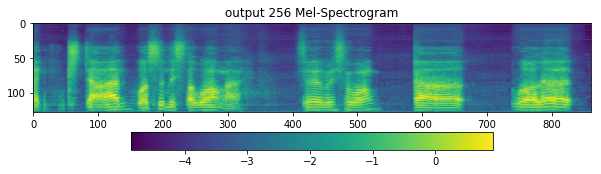

In [18]:
D = librosa.stft(
    output,
    n_fft=fft_size,
    hop_length=hop_size,
    win_length=win_length,
    window=window,
    pad_mode='reflect',
)
S, _ = librosa.magphase(D)
mel = np.log10(np.maximum(np.dot(mel_basis, S), 1e-10)).T
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('output 256 Mel-Spectrogram')
im = ax1.imshow(np.rot90(mel), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

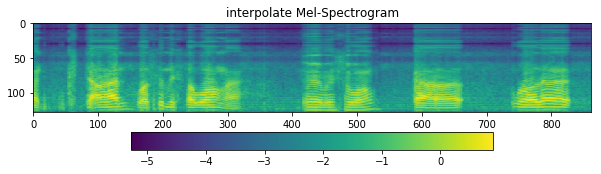

In [19]:
D = librosa.stft(
    y,
    n_fft=fft_size,
    hop_length=hop_size,
    win_length=win_length,
    window=window,
    pad_mode='reflect',
)
S, _ = librosa.magphase(D)
mel = np.log10(np.maximum(np.dot(mel_basis, S), 1e-10)).T
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('interpolate Mel-Spectrogram')
im = ax1.imshow(np.rot90(mel), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Use Pipeline

Incase your audio is too long and you do not want to burden your machine. So, you can use malaya-speech Pipeline to split the audio splitted to 3 seconds, predict one-by-one and combine after that.

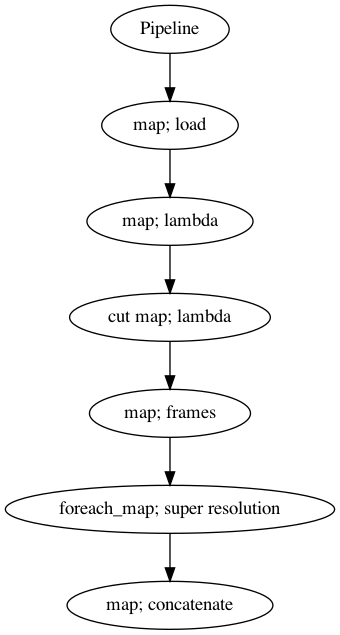

In [36]:
p = Pipeline()
pipeline = (
    p.map(malaya_speech.load, sr = sr)
    .map(lambda x: x[0])
    .map(lambda x: x[sr * 5: sr * 20], name = 'cut')
    .map(malaya_speech.generator.frames, frame_duration_ms = 3000, sample_rate = sr)
    .foreach_map(model)
    .map(np.concatenate)
)
p.visualize()

In [37]:
%%time

results = p('speech/call-centre/1.wav')

CPU times: user 53.5 s, sys: 14.8 s, total: 1min 8s
Wall time: 19.4 s


In [38]:
results.keys()

dict_keys(['load', '<lambda>', 'cut', 'frames', 'super-resolution', 'concatenate'])

In [39]:
ipd.Audio(results['concatenate'], rate = sr)

In [40]:
ipd.Audio(results['cut'], rate = sr)